In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc


# Load data from CSV file
data = pd.read_csv('/content/good_thyroidDF.csv')
#extra
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
count,9172.000000,8865,9172,9172,9172,9172,9172,9172,9172,9172,...,8730.000000,9172,8363.000000,9172,8370.000000,9172,349.000000,9172,9172,9.172000e+03
unique,NaN,2,2,2,2,2,2,2,2,2,...,NaN,2,NaN,2,NaN,2,NaN,6,32,NaN
top,NaN,F,f,f,f,f,f,f,f,f,...,NaN,t,NaN,t,NaN,f,NaN,other,-,NaN
freq,NaN,6073,7932,9019,9056,8828,9065,9038,9003,8542,...,NaN,8363,NaN,8370,NaN,8823,NaN,5493,6771,NaN
mean,73.555822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108.700305,NaN,0.976056,NaN,113.640746,NaN,29.870057,NaN,NaN,8.529473e+08
std,1183.976718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.522670,NaN,0.200360,NaN,41.551650,NaN,21.080504,NaN,NaN,7.581969e+06
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,0.170000,NaN,1.400000,NaN,0.100000,NaN,NaN,8.408010e+08
25%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.000000,NaN,0.860000,NaN,93.000000,NaN,21.000000,NaN,NaN,8.504090e+08
50%,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.000000,NaN,0.960000,NaN,109.000000,NaN,26.000000,NaN,NaN,8.510040e+08
75%,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.000000,NaN,1.065000,NaN,128.000000,NaN,31.000000,NaN,NaN,8.607110e+08


In [ ]:
data = data.drop('patient_id', axis=1)

# Replace empty strings with NaN
data = data.replace(" ", np.nan)
# Impute missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
# Data cleaning and preprocessing
selected_columns = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
                     'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
                     'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
                     'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
                     'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
                     'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source', 'target']


# Select relevant columns and drop rows with missing values
data_cleaned = data[selected_columns].dropna()


In [ ]:
# Encoding categorical variables
label_encoders = {}
for column in ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
               'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
               'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured',
               'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source', 'target']:
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

In [ ]:
# Standardize numerical features (age, T3, TT4, T4U, FTI)
scaler = StandardScaler()
data_cleaned[['age', 'T3', 'TT4', 'T4U', 'FTI']] = scaler.fit_transform(data_cleaned[['age', 'T3', 'TT4', 'T4U', 'FTI']])

# Check for outliers using z-scores
for column in data.columns:
    if data[column].dtype == np.float64:
        z = np.abs(data[column] - data[column].mean()) / data[column].std()
        outliers = z[z > 3].index
        data.drop(outliers, axis=0, inplace=True)

# Define features (X) and target variable (y)
X = data_cleaned.drop('target', axis=1)
y = data_cleaned['target']
data.info()
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  9172 non-null   object
 1   sex                  9172 non-null   object
 2   on_thyroxine         9172 non-null   object
 3   query_on_thyroxine   9172 non-null   object
 4   on_antithyroid_meds  9172 non-null   object
 5   sick                 9172 non-null   object
 6   pregnant             9172 non-null   object
 7   thyroid_surgery      9172 non-null   object
 8   I131_treatment       9172 non-null   object
 9   query_hypothyroid    9172 non-null   object
 10  query_hyperthyroid   9172 non-null   object
 11  lithium              9172 non-null   object
 12  goitre               9172 non-null   object
 13  tumor                9172 non-null   object
 14  hypopituitary        9172 non-null   object
 15  psych                9172 non-null   object
 16  TSH_me

In [ ]:
# Train Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)
rf_predictions = random_forest_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print the accuracy
print(f'Random Forest Classifier Accuracy: {rf_accuracy * 100:.2f}%')


Random Forest Classifier Accuracy: 94.06%


In [ ]:
# Train Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)
logistic_predictions = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic Regression Classifier Accuracy: {logistic_accuracy * 100:.2f}%')



Logistic Regression Classifier Accuracy: 82.62%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Train K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'K-Nearest Neighbors Classifier Accuracy: {knn_accuracy * 100:.2f}%')


K-Nearest Neighbors Classifier Accuracy: 85.45%


In [ ]:
# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Classifier Accuracy: {dt_accuracy * 100:.2f}%')

Decision Tree Classifier Accuracy: 94.44%


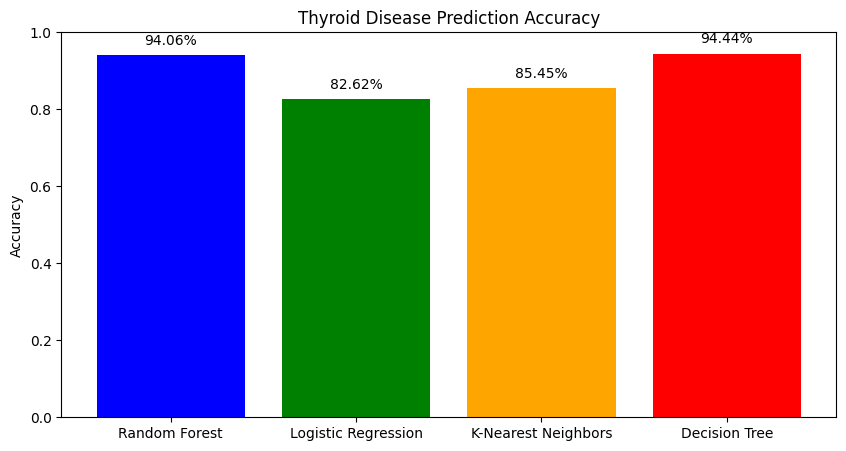

In [ ]:
# Visualize Predictions Using Bar Chart
labels = ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree']
accuracy_scores = [rf_accuracy, logistic_accuracy, knn_accuracy, dt_accuracy]

plt.figure(figsize=(10, 5))
plt.bar(labels, accuracy_scores, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Thyroid Disease Prediction Accuracy')
plt.ylim(0, 1)

# Adding percentage labels
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.02, f'{v*100:.2f}%', ha='center', va='bottom')


plt.show()

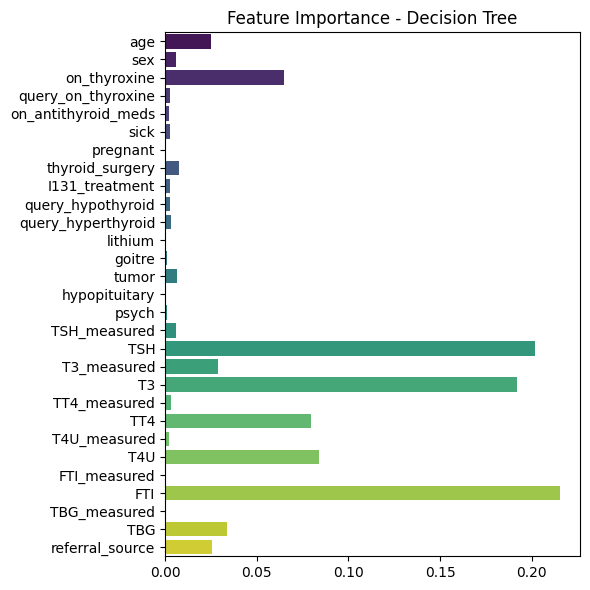

In [ ]:
# Feature Importance Plot for DECISION TREE
plt.figure(figsize=(6, 6))
classifier = dt_classifier  # Use only Decision Tree classifier
if hasattr(classifier, 'feature_importances_'):
    feature_importance = classifier.feature_importances_
    features = X.columns
    sns.barplot(x=feature_importance, y=features, palette='viridis')
    plt.title('Feature Importance - Decision Tree')

plt.tight_layout()
plt.show()


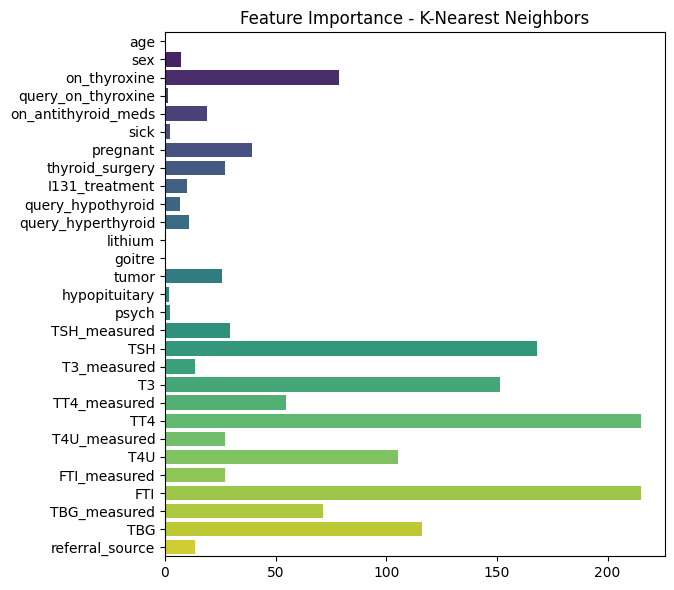

Selected features with importance above the threshold: Index(['sex', 'on_thyroxine', 'on_antithyroid_meds', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'query_hyperthyroid', 'tumor',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG',
       'referral_source'],
      dtype='object')
Selected features with importance below the threshold: Index(['age', 'query_on_thyroxine', 'sick', 'query_hypothyroid', 'lithium',
       'goitre', 'hypopituitary', 'psych'],
      dtype='object')
K-Nearest Neighbors Classifier Accuracy (Reduced Features): 85.50%


In [ ]:
# Feature Selection for K-Nearest Neighbors
from sklearn.feature_selection import SelectKBest, f_classif

knn_feature_selector = SelectKBest(score_func=f_classif, k='all')
knn_feature_selector.fit(X_train, y_train)

# Get selected feature indices
selected_feature_indices_knn = knn_feature_selector.get_support(indices=True)

# Feature Importance Plot for K-Nearest Neighbors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Plotting selected features with y-axis as feature values
sns.barplot(x=knn_feature_selector.scores_[selected_feature_indices_knn], y=X.columns[selected_feature_indices_knn], palette='viridis')
plt.title('Feature Importance - K-Nearest Neighbors')

plt.tight_layout()
plt.show()
# Extract feature importance scores
feature_importance_scores = knn_feature_selector.scores_

# Determine the threshold based on the distribution of feature importance scores
threshold = np.percentile(feature_importance_scores, 25)  # 25th percentile

# Select features with importance above the threshold
selected_features = X.columns[feature_importance_scores > threshold]

print(f'Selected features with importance above the threshold: {selected_features}')

# Extract feature importance scores
feature_importance_scores = knn_feature_selector.scores_

# Determine the threshold based on the distribution of feature importance scores
threshold = np.percentile(feature_importance_scores, 25)  # 25th percentile

# Select features with importance below the threshold
selected_features = X.columns[feature_importance_scores <= threshold]

print(f'Selected features with importance below the threshold: {selected_features}')
# Remove specified features from K-Nearest Neighbors
selected_features_to_remove = ['age', 'query_on_thyroxine', 'sick', 'query_hypothyroid', 'lithium', 'goitre', 'hypopituitary', 'psych']
X_train_reduced_knn = X_train.drop(selected_features_to_remove, axis=1)
X_test_reduced_knn = X_test.drop(selected_features_to_remove, axis=1)

# Retrain K-Nearest Neighbors Classifier with selected features
knn_classifier_reduced = KNeighborsClassifier()
knn_classifier_reduced.fit(X_train_reduced_knn, y_train)

# Evaluate K-Nearest Neighbors Classifier with reduced features
knn_predictions_reduced = knn_classifier_reduced.predict(X_test_reduced_knn)
knn_accuracy_reduced = accuracy_score(y_test, knn_predictions_reduced)
print(f'K-Nearest Neighbors Classifier Accuracy (Reduced Features): {knn_accuracy_reduced * 100:.2f}%')




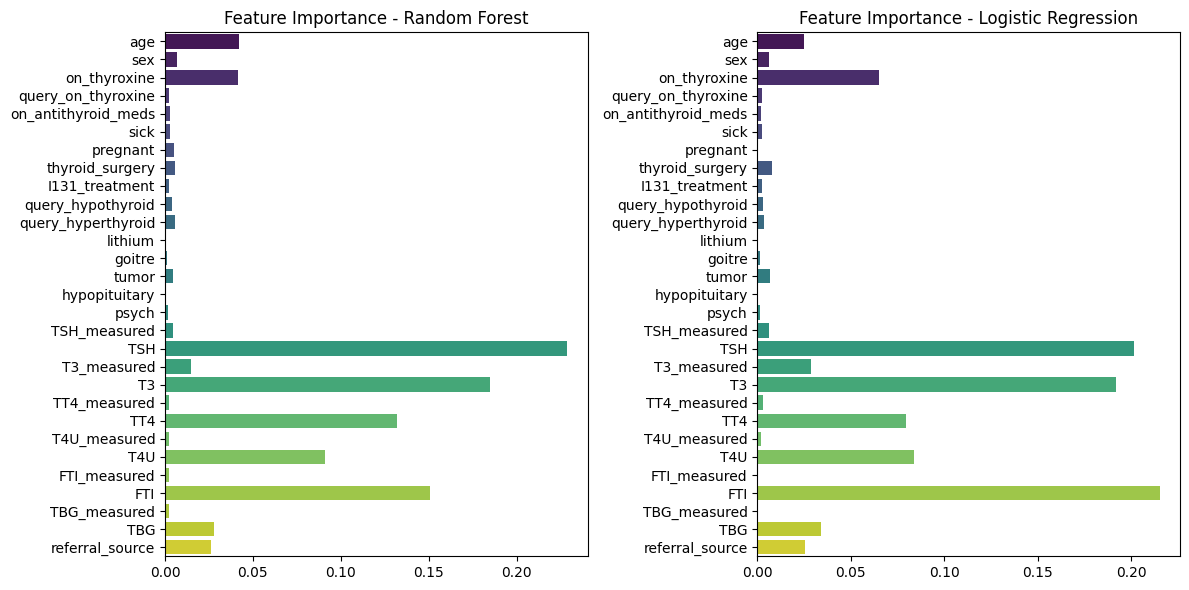

Selected features for Logistic Regression with importance below the threshold: Index(['on_antithyroid_meds', 'pregnant', 'query_hypothyroid', 'tumor',
       'T3_measured', 'TT4', 'FTI', 'referral_source'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Feature Importance Plot
plt.figure(figsize=(12, 6))
for i, classifier in enumerate([random_forest_classifier, dt_classifier], 1):
    plt.subplot(1, 2, i)
    if hasattr(classifier, 'feature_importances_'):
        feature_importance = classifier.feature_importances_
        features = X.columns
        sns.barplot(x=feature_importance, y=features, palette='viridis')
        plt.title(f'Feature Importance - {labels[i-1]}')

plt.tight_layout()
plt.show()
# Feature Importance for Logistic Regression
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Get feature importance scores
logistic_feature_importance_scores = logistic_regression_classifier.coef_[0]

# Determine the threshold based on the distribution of feature importance scores
logistic_threshold = np.percentile(logistic_feature_importance_scores, 25)  # 25th percentile

# Select features with importance below the threshold
logistic_selected_features = X.columns[logistic_feature_importance_scores <= logistic_threshold]

print(f'Selected features for Logistic Regression with importance below the threshold: {logistic_selected_features}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

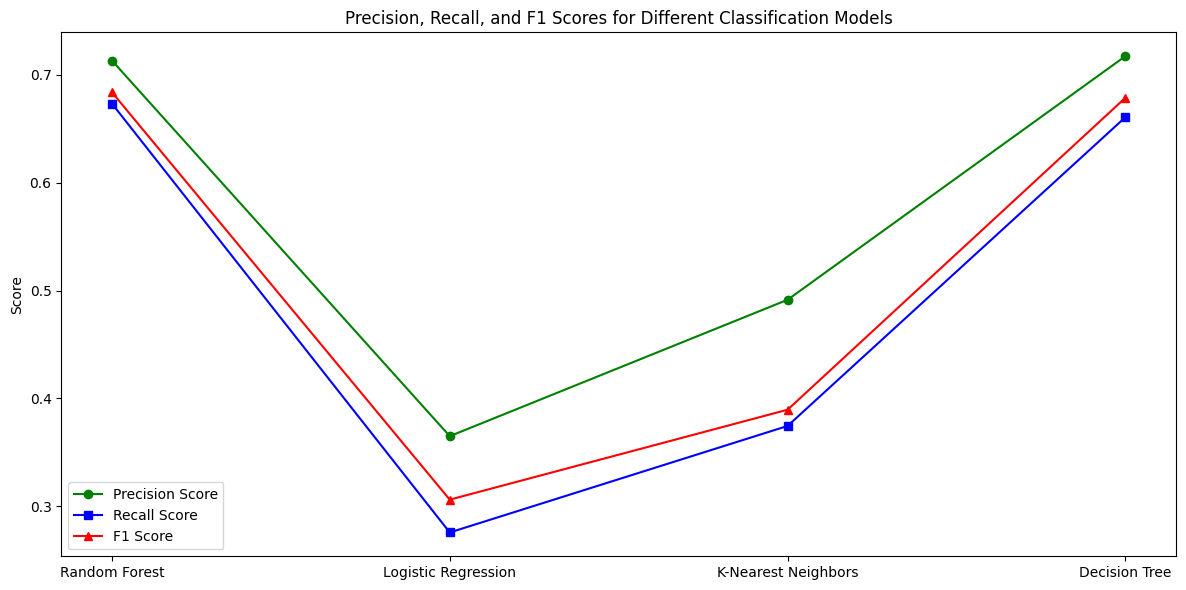

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Load the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluate the models
rf_predictions = rf_model.predict(X_test)
rf_precision = precision_score(y_test, rf_predictions, average='macro')
rf_recall = recall_score(y_test, rf_predictions, average='macro')
rf_f1 = f1_score(y_test, rf_predictions, average='macro')

logistic_predictions = logistic_model.predict(X_test)
logistic_precision = precision_score(y_test, logistic_predictions, average='macro')
logistic_recall = recall_score(y_test, logistic_predictions, average='macro')
logistic_f1 = f1_score(y_test, logistic_predictions, average='macro')

knn_predictions = knn_model.predict(X_test)
knn_precision = precision_score(y_test, knn_predictions, average='macro')
knn_recall = recall_score(y_test, knn_predictions, average='macro')
knn_f1 = f1_score(y_test, knn_predictions, average='macro')

dt_predictions = dt_model.predict(X_test)
dt_precision = precision_score(y_test, dt_predictions, average='macro')
dt_recall = recall_score(y_test, dt_predictions, average='macro')
dt_f1 = f1_score(y_test, dt_predictions, average='macro')

# Check for data imbalance
class_counts = np.bincount(y_train)
minority_class_proportion = min(class_counts) / sum(class_counts)

if minority_class_proportion < 0.1:
    print("Warning: Data imbalance detected. Consider using oversampling or undersampling techniques.")


# Plot the results
precision_scores = [rf_precision, logistic_precision, knn_precision, dt_precision]
recall_scores = [rf_recall, logistic_recall, knn_recall, dt_recall]
f1_scores = [rf_f1, logistic_f1, knn_f1, dt_f1]
labels = ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree']

plt.figure(figsize=(12, 6))

# Add precision scores to the graph
plt.plot(labels, precision_scores, marker='o', color='green', linestyle='-', label='Precision Score')

# Add recall scores to the graph
plt.plot(labels, recall_scores, marker='s', color='blue', linestyle='-', label='Recall Score')

# Add F1 scores to the graph
plt.plot(labels, f1_scores, marker='^', color='red', linestyle='-', label='F1 Score')

plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Scores for Different Classification Models')
plt.legend()
plt.tight_layout()
plt.show()